# Class \#11 activities

# Practice with `xarray`: World Ocean Atlas global ocean temperatures

In [ ]:
# Import NumPy, Pandas, xarray, Matplotlib, and datetime at the top of your code
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Download netCDF4 library
!pip install netcdf4  # You can comment this out once it has run

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 4.3MB 2.7MB/s 
     |████████████████████████████████| 296kB 36.2MB/s 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Filepath for World Ocean Atlas 2018 (WOA18) temperature netCDF file

# Note: you may need to change this to match your own filepath,
# which you can get by opening the left sidebar (folder icon),
# navigating to the file, clicking the "..." on the file, and
# selecting "Copy path"
filepath = '/content/drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-10 - class #11 - data/woa18_temp.nc'

## **Breakout rooms, round 1**

0. Assign roles:
> * **Choose one person to write code and share their screen.**
> * **Choose a different person to take notes on the answers to report back to the class.**
1. Load the WOA18 netCDF file into xarray using `xr.open_dataset()`.
2. Display the data.
3. Using just the interactive display, answer the following questions with your group:

* How many data variables are there?
* The variable abbreviations aren't very informative. Using the attributes button (page icon), can you tell what the variables represent?
* What is the time range of the data?
* What is the latitude and longitude resolution (spacing) of the data? Note that we call this the "grid spacing" or "resolution" of the data.
* What is the deepest depth level in the data?
* Take a peek at the 46 attributes. What is one thing you can learn from them?

In [ ]:
# Load the data file from Google Drive as an xarray Dataset
temp = xr.open_dataset(filepath)

# View data and stats
display(temp)

# Answers
# a. 2 variables
# b. Average temperature and number of observations per grid cell
# c. 1960-2011
# d. 1°
# e. 5500 m

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 6)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * time     (time) datetime64[ns] 1960-01-01 1970-01-01 ... 2011-01-01
Data variables:
    t_an     (time, depth, lat, lon) float32 ...
    t_dd     (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_duration:          P10Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Temperature > Water Temper...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

## **Breakout rooms, round 2**

![Image](https://i.pinimg.com/originals/af/a6/71/afa67151f8c1ae920a24f2ff98087417.gif)

Steps to work on as a group:

1. Use the ocean map to find the longitude (in units of °N) and latitude (in units of °E) of your favorite part of the global oceans.
2. Use indexing to find out the most recent ocean surface temperature (in 2011) at that location. Hint: you'll need either `.isel()` or `.sel()` to do this.
3. Convert this result from `xarray` format to a single float number.

Steps that we'll discuss as a class:

1. Use indexing to get a time series of ocean surface temperature at the location you choose earlier. Save this as a new variable, `time_series`. (In other words, select in latitude, longitude, and depth, leaving a single dimension: time.)
2. Use indexing to get a depth profile of ocean temperature at the location you choose earlier in 2011. Save this as a new variable, `depth_profile`. (In other words, select in latitude, longitude, and time, leaving a single dimension: depth.)
3. Take a peek into these new variables using `display()`. How would we convert these from `xarray` format to 1-D NumPy arrays?
4. Plot the data.

In [ ]:
# Write code here:
# -35°N, 110°E
temp.sel(depth=0,lat=-35,lon=110,time=datetime(2011,1,1),method='nearest')['t_an'].item()

time_series = temp.sel(depth=0,lat=46,lon=-128,method='nearest')['t_an']
display(time_series)

depth_profile = temp.sel(lat=46,lon=-128,time=datetime(2011,1,1),method='nearest')['t_an']
display(depth_profile)

<xarray.DataArray 't_an' (time: 6)>
array([12.13939 , 11.557309, 12.053809, 12.469   , 12.54699 , 12.28359 ],
      dtype=float32)
Coordinates:
    lat      float32 46.5
    lon      float32 -127.5
    depth    float32 0.0
  * time     (time) datetime64[ns] 1960-01-01 1970-01-01 ... 2011-01-01
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

<xarray.DataArray 't_an' (depth: 102)>
array([12.28359 , 12.236891, 12.12149 , 11.995391, 11.823   , 11.56039 ,
       11.2394  , 10.86769 , 10.48499 , 10.13469 ,  9.80599 ,  9.45741 ,
        9.22761 ,  9.02841 ,  8.845091,  8.67829 ,  8.51851 ,  8.385091,
        8.262091,  8.151409,  8.057509,  7.78181 ,  7.60519 ,  7.3891  ,
        7.13661 ,  6.87709 ,  6.62841 ,  6.39269 ,  6.17411 ,  5.97299 ,
        5.79171 ,  5.62489 ,  5.4736  ,  5.3348  ,  5.20839 ,  5.09211 ,
        4.98801 ,  4.78741 ,  4.60779 ,  4.44011 ,  4.28301 ,  4.1431  ,
        3.99991 ,  3.86751 ,  3.74121 ,  3.61401 ,  3.49789 ,  3.3786  ,
        3.26571 ,  3.15461 ,  3.05081 ,  2.9508  ,  2.8504  ,  2.75689 ,
        2.6666  ,  2.58041 ,  2.49761 ,  2.41569 ,  2.34019 ,  2.26849 ,
        2.20359 ,  2.1448  ,  2.09019 ,  2.03921 ,  1.99301 ,  1.95381 ,
        1.91519 ,  1.86401 ,  1.8251  ,  1.79659 ,  1.7768  ,  1.76599 ,
        1.76079 ,  1.76041 ,  1.765   ,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
    lat      float32 46.5
    lon      float32 -127.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
    time     datetime64[ns] 2011-01-01
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

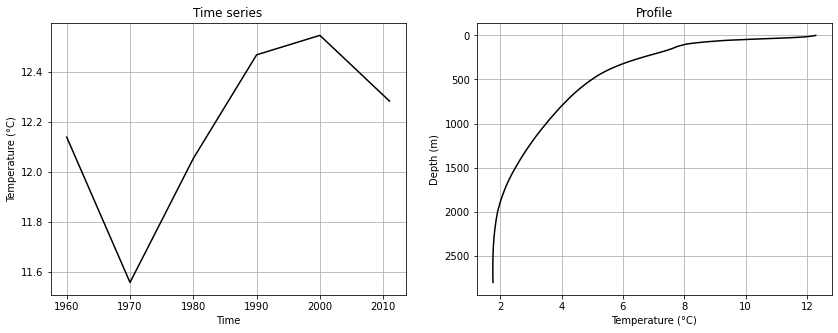

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

ax1.plot(time_series['time'].values,time_series,c='k')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Time series')
ax1.grid()

ax2.plot(depth_profile.values,depth_profile['depth'],c='k')
ax2.invert_yaxis()
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Depth (m)')
ax2.set_title('Profile')
ax2.grid()

## **Breakout rooms, round 3**




1. Create a 1-dimensional array that contains all of the temperature measurements from the WOA dataset.
2. Create figure with a histogram of these temperatures, using 50 bins.
3. Put a line on the histogram showing the average temperature. Put text next to the line that shows the average temperature.
4. Put two dashed lines on the histogram. Have one line show the average temperature plus the standard deviation. Have the other line show the average temperature minus the standard deviation.
5. Format your figure with a grid and proper labels. Make sure that the y limits match your average and standard deviation lines.
6. Save your figure as a png to your Google drive using `plt.savefig()`


(39657600,)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


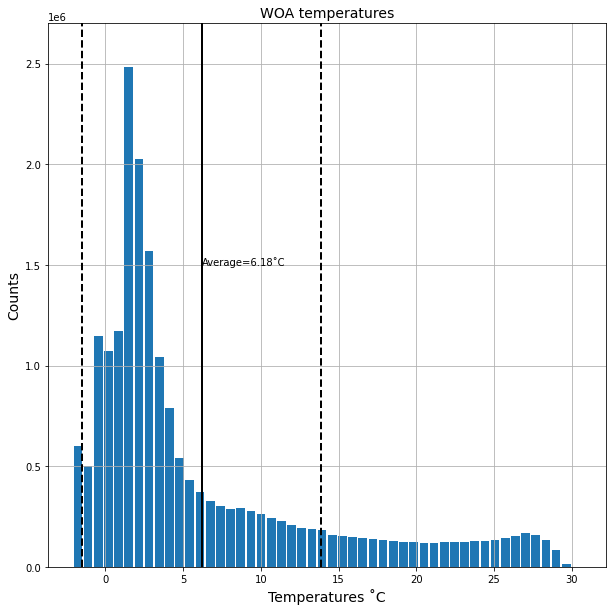

In [ ]:
temperature = temp['t_an'].values.flatten()
print(temperature.shape)

fig = plt.figure(figsize=(10,10))
p = plt.hist(temperature,bins=50, rwidth=0.85)

temp_ave = np.nanmean(temperature)
temp_std = np.nanstd(temperature)


plt.plot([temp_ave,temp_ave],[0,2.7e6],c='k',lw=2)
plt.text(temp_ave,1.5e6,'Average='+str(round(temp_ave,2))+'˚C')
plt.plot([temp_ave+temp_std,temp_ave+temp_std],[0,2.7e6],c ='k',ls='--',lw=2)
plt.plot([temp_ave-temp_std,temp_ave-temp_std],[0,2.7e6],c ='k',ls='--',lw=2)

plt.grid()
plt.ylim((0,2.7e6))
plt.xlabel('Temperatures ˚C',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.title('WOA temperatures',fontsize=14)

plt.savefig('drive/My Drive/WOA_hist.png')

## **Debugging activity**




Below, you are given code from the lesson #11 code demo video. However, this code is filled with 18 different errors. 
1. Find and write down the error type for each error that occurs (use the flowchart as a reference).
2. Fix the errors and run the code. Note that you may need to change your folder path to access the data.

<img src="https://drive.google.com/uc?export=view&id=1FnfMQVaWVqpJBtZLiZvICp8OVyL_3nSl" width="750" />

In [ ]:
# Import statements and drive mount
import numpy as np
import matplotlib.pyplot as pl
from google.drive import drive
drive.mount('/content/drive')

# Where the file is and its name
folderpath= '/content/drive/My Drive/Data_folder/'
filename = 'Dissolved Inorganic Nutrients.csv

# Read the data
data = pd.read_csv(folderpath + filname, parse_dates=[1], na_values=-999)
data.describe

# Clean the data and take averages for each day of data
nitrate = data['Nitrite and Nitrate (µmol/L)']
data['Nitrite and Nitrate (µmol/L)'] = nitrate.where(nitrate>0)

cleandata = data.groupby('Datetime GMT').mean

# Assign variable names and change to np arrays
P = cleandata['Phosphate (µmol/L)'.values
S = clandata['Silicate (µmol/L)'].values
N = cleandata["Nitrite and Nitrate (µmol/L)'].values
dates = cleandata.index.values

# Make a figure and plot the data
fig = plt.figure(figsize=(10,10))
ax.plot(data,S,'s-',c='mediumblue',label='S')
ax.plot(dates,N,'*-',c='darkgreen',label='N')
ax.plot(datas,P,'o-',c='firebrick',label='P')

# Format the figure
plt.set_xlabel('Dates')
plt.set_ylabel('Concentration (µmol/L)")
plt.title('Inorganic nutrients')
plt.grid()
plt.yscale('log')
plt.gca.legend()

# Save the figure
plt.savefig(folderpath 'lineplots.png')